In [3]:
import biokbase.data_api
import biokbase.data_api.genome_annotation

In [5]:
def get_genome_summary(genome_annotation=None):
    if genome_annotation == None:
        raise TypeError("No GenomeAnnotation object given.")
    elif genome_annotation.get_typestring().split('-')[0] not in biokbase.data_api.genome_annotation.TYPES:
        raise TypeError("{0} is not a recognized GenomeAnnotation type.".format(type(genome_annotation)))
    
    taxon = genome_annotation.get_taxon()
    assembly = genome_annotation.get_assembly()
    
    overview = dict()
    
    #get tax info
    taxon_details = dict()
    taxon_details["taxonomic_id"] = taxon.get_taxonomic_id()
    taxon_details["kingdom"] = taxon.get_kingdom()
    taxon_details["domain"] = taxon.get_domain()
    taxon_details["genetic_code"] = taxon.get_genetic_code()
    taxon_details["scientific_name"] = taxon.get_scientific_name()
    taxon_details["aliases"] = taxon.get_aliases()
    taxon_details["scientific_lineage"] = taxon.get_scientific_lineage()

    overview["taxon"] = taxon_details
    
    #get assembly info
    assembly_details = dict()
    assembly_details["number_of_contigs"] = assembly.get_number_contigs()
    assembly_details["total_length"] = assembly.get_dna_size()
    assembly_details["total_gc_content"] = assembly.get_gc_content()
    assembly_details["contig_length"] = assembly.get_contig_lengths()
    assembly_details["contig_gc_content"] = assembly.get_contig_gc_content()
    
    overview["assembly"] = assembly_details
    
    #get annotation info
    annotation_details = dict()
    annotation_details["feature_types"] = genome_annotation.get_feature_types()
    annotation_details["feature_type_descriptions"] = genome_annotation.get_feature_type_descriptions(annotation_details["feature_types"])
    annotation_details["feature_type_counts"] = genome_annotation.get_feature_type_counts(annotation_details["feature_types"])
    
    overview["annotation"] = annotation_details
    
    return overview

In [6]:
import pprint
import datetime

def parse_all_existing_annotations():
    annotations = dict()
    for x in object_list:
        if x.type.startswith("KBaseGenomes.Genome"):
            annotations[x.name] = x
    return annotations

b = biokbase.data_api.browse(1011)

object_list = b.ls()

test = b["kb|g.3157"]

# selected 4 Eukaryotes as a sample
#arabidopsis = b["kb|g.3899"]
#glycine_max = b["kb|g.217869"]
#populus_trichocarpa = b["kb|g.3907"]
#eucalyptus_grandis = b["kb|g.217867"]

#annotations = {
#    arabidopsis.name: arabidopsis.object,
#    glycine_max.name: glycine_max.object,
#    populus_trichocarpa.name: populus_trichocarpa.object,
#    eucalyptus_grandis.name: eucalyptus_grandis.object
#}

annotations = {test.name: test.object}

start = datetime.datetime.utcnow()
for n in annotations:
    print '\n'
    print '#'*80
    print '#'*80
    print '\n'    
    
    print n
    overview = get_genome_summary(annotations[n])
    print overview["assembly"]["contig_length"] 
    #pprint.pprint(overview)
    
    print '\n'
    print '#'*80
    print '#'*80
    print '\n'
end = datetime.datetime.utcnow()

print "Total time to summarize existing Genome Annotations, Taxons, Assemblies : {0}".format(end - start)



################################################################################
################################################################################


kb|g.3157
{u'kb|g.3157.c.121': 70327, u'kb|g.3157.c.120': 84981, u'kb|g.3157.c.123': 90416, u'kb|g.3157.c.122': 71300, u'kb|g.3157.c.125': 93091, u'kb|g.3157.c.124': 82637, u'kb|g.3157.c.127': 65085, u'kb|g.3157.c.126': 82452, u'kb|g.3157.c.389': 5995, u'kb|g.3157.c.388': 6012, u'kb|g.3157.c.385': 6081, u'kb|g.3157.c.384': 6216, u'kb|g.3157.c.387': 6887, u'kb|g.3157.c.386': 6226, u'kb|g.3157.c.381': 6239, u'kb|g.3157.c.380': 6379, u'kb|g.3157.c.383': 6192, u'kb|g.3157.c.382': 6229, u'kb|g.3157.c.29': 1055366, u'kb|g.3157.c.28': 1103520, u'kb|g.3157.c.27': 1156490, u'kb|g.3157.c.26': 1122296, u'kb|g.3157.c.25': 1146214, u'kb|g.3157.c.24': 1172259, u'kb|g.3157.c.23': 1188375, u'kb|g.3157.c.22': 1231822, u'kb|g.3157.c.21': 1227004, u'kb|g.3157.c.20': 1226893, u'kb|g.3157.c.298': 8974, u'kb|g.3157.c.338': 7581, u'kb|g.3157.c.3

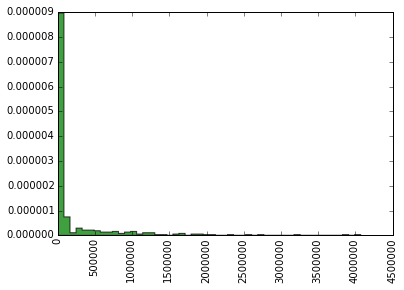

In [45]:
import pylab as P
from IPython.display import display, HTML
#import matplotlib
#import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
%matplotlib inline

len_data = [None] * len(overview["assembly"]["contig_length"])
count = 0
for key,value in overview["assembly"]["contig_length"].iteritems():
    len_data[count] = value
    count = count + 1
    

n, bins, patches = P.hist(len_data, 50, normed=1, histtype='stepfilled')
P.setp(patches, 'facecolor', 'g', 'alpha', 0.75)

locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

##the size argument is not respected somehow
P.figure(figsize=(2,10))

